In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# List of city names and states
cities = ['New York', 'Jacksonville', 'Dallas', 'San Antonio', 'San Diego', 'Houston', 'Phoenix', 'Philadelphia', 'Los Angeles', 'Seattle']
states = ['NY', 'FL', 'TX', 'TX', 'CA', 'TX', 'AZ', 'PA', 'CA', 'WA']

In [3]:
AirQ = pd.read_csv('/Users/rileychisholm/Downloads/US_AQI_monthly.csv')

In [4]:
AirQ

City        Date         AQI                        Category  \
0      Dallas  1980-01-01   38.258065                            Good   
1      Dallas  1980-02-01   53.344828                            Good   
2      Dallas  1980-03-01   73.548387                        Moderate   
3      Dallas  1980-04-01   99.533333  Unhealthy for Sensitive Groups   
4      Dallas  1980-05-01  101.096774  Unhealthy for Sensitive Groups   
...       ...         ...         ...                             ...   
5066  Seattle  2021-10-01   43.774194                            Good   
5067  Seattle  2021-11-01   43.966667                            Good   
5068  Seattle  2021-12-01   50.096774                            Good   
5069  Seattle  2022-01-01   58.870968                        Moderate   
5070  Seattle  2022-02-01    6.000000                            Good   

     Main Pollutant state_id  density  
0               NO2       TX   1522.0  
1             Ozone       TX   1522.0  
2             Ozone       TX   1522.0  
3             Ozone       TX   1522.0  
4             Ozone       TX   1522.0  
...             ...      ...      ...  
5066          Ozone       WA   3414.0  
5067          PM2.5       WA   3414.0  
5068          PM2.5       WA   3414.0  
5069          PM2.5       WA   3414.0  
5070             CO       WA   3414.0  

[5071 rows x 7 columns]

In [5]:
combined_df = pd.read_csv('/Users/rileychisholm/Downloads/Combined_Weather_Data.csv')


In [6]:
# Converts DATE to datetime
combined_df['DATE'] = pd.to_datetime(combined_df['DATE'])

In [13]:
# Converts DATE to datetime
AirQ['Date'] = pd.to_datetime(AirQ['Date'])

In [23]:
# Merges the dataframes on 'City' and 'Date'
merged_df = pd.merge(AirQ, combined_df[['City', 'DATE', 'Population']], left_on=['City', 'Date'], right_on=['City', 'DATE'], how='left')


In [24]:
merged_df

City       Date         AQI                        Category  \
0      Dallas 1980-01-01   38.258065                            Good   
1      Dallas 1980-02-01   53.344828                            Good   
2      Dallas 1980-03-01   73.548387                        Moderate   
3      Dallas 1980-04-01   99.533333  Unhealthy for Sensitive Groups   
4      Dallas 1980-05-01  101.096774  Unhealthy for Sensitive Groups   
...       ...        ...         ...                             ...   
5066  Seattle 2021-10-01   43.774194                            Good   
5067  Seattle 2021-11-01   43.966667                            Good   
5068  Seattle 2021-12-01   50.096774                            Good   
5069  Seattle 2022-01-01   58.870968                        Moderate   
5070  Seattle 2022-02-01    6.000000                            Good   

     Main Pollutant state_id  density  month  Cluster       DATE  Population  
0               NO2       TX   1522.0      1        2 1980-01-01    904078.0  
1             Ozone       TX   1522.0      2        2 1980-02-01    904078.0  
2             Ozone       TX   1522.0      3        2 1980-03-01    904078.0  
3             Ozone       TX   1522.0      4        2 1980-04-01    904078.0  
4             Ozone       TX   1522.0      5        2 1980-05-01    904078.0  
...             ...      ...      ...    ...      ...        ...         ...  
5066          Ozone       WA   3414.0     10        0 2021-10-01    737015.0  
5067          PM2.5       WA   3414.0     11        0 2021-11-01    737015.0  
5068          PM2.5       WA   3414.0     12        0 2021-12-01    737015.0  
5069          PM2.5       WA   3414.0      1        0 2022-01-01    737015.0  
5070             CO       WA   3414.0      2        0 2022-02-01    737015.0  

[5071 rows x 11 columns]

In [30]:
# Counts missing values per column
missing_values = merged_df.isnull().sum()
print(missing_values)

City              0
Date              0
AQI               0
Category          0
Main Pollutant    0
state_id          0
density           0
month             0
Cluster           0
DATE              1
Population        1
dtype: int64


In [31]:
# Counts missing values per column
missing_values = AirQ.isnull().sum()
print(missing_values)

City              0
Date              0
AQI               0
Category          0
Main Pollutant    0
state_id          0
density           0
month             0
Cluster           0
dtype: int64


In [33]:
merged_df.dropna(inplace=True)

In [10]:
print(AirQ.describe())
print(AirQ.describe(include=['object']))

               AQI       density
count  5071.000000   5071.000000
mean     74.740013   2948.838888
std      33.442497   2873.100551
min       3.000000    466.000000
25%      51.872984   1236.000000
50%      65.677419   1522.000000
75%      88.266667   3414.000000
max     286.838710  10768.000000
            City        Date  Category Main Pollutant state_id
count       5071        5071      5071           5071     5071
unique        10         509         6              5        7
top     New York  1980-01-01  Moderate          Ozone       TX
freq         509          10      2611           2611     1521


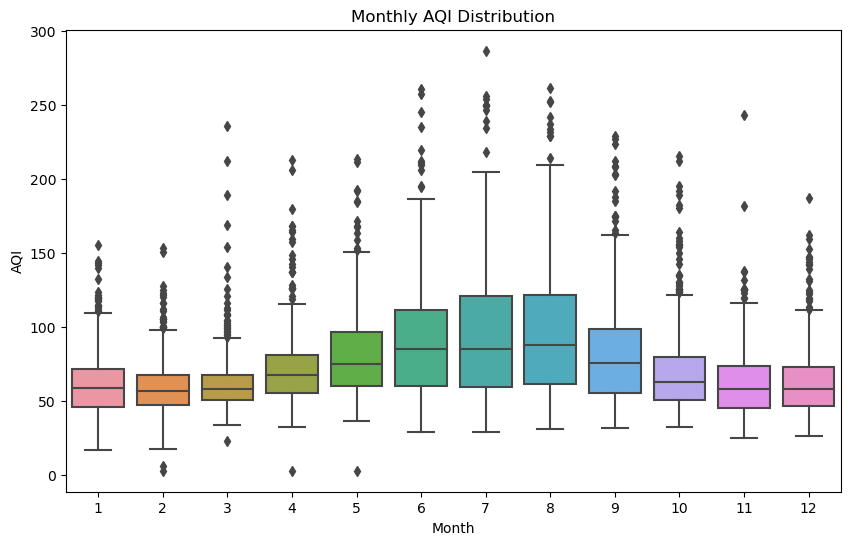

In [14]:
# Box plot for AQI by month
AirQ['month'] = AirQ['Date'].dt.month

plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='AQI', data=AirQ)
plt.xlabel('Month')
plt.ylabel('AQI')
plt.title('Monthly AQI Distribution')
plt.show()

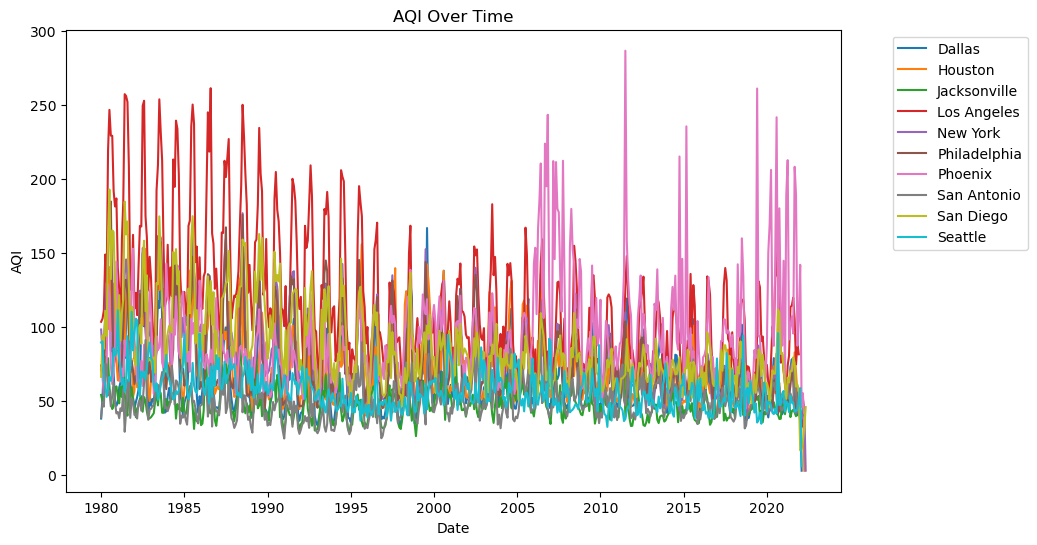

In [15]:
# Times series plot for AQI
plt.figure(figsize=(10, 6))
sns.lineplot(data=AirQ, x='Date', y='AQI', hue='City')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('AQI Over Time')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

In [16]:
# Function to perform linear regression analysis for one city
def linear_regression_city(city_name):
    # Filter for one city
    city_aqi_df = AirQ[AirQ['City'] == city_name]

    # Merge with population data
    city_pop_df = combined_df[combined_df['City'] == city_name][['Year', 'Population']].drop_duplicates()
    city_merged_df = pd.merge(city_aqi_df, city_pop_df, left_on=city_aqi_df['Date'].dt.year, right_on='Year', how='left')

    # Check for NaN values after merging and drop NaN rows if any
    city_merged_df.dropna(inplace=True)

    # Linear Regression model for AQI prediction based on urban population
    X = city_merged_df[['Population']]
    y = city_merged_df['AQI']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and fit the model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = lr_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'\nAnalysis for {city_name}:\n')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')

    # Plot predictions vs actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
    plt.title(f'Linear Regression: Predicted vs Actual AQI for {city_name}')
    plt.xlabel('Urban Population')
    plt.ylabel('AQI')
    plt.legend()
    plt.show()


Analysis for New York:

Mean Squared Error: 376.48541982251123
R-squared: 0.48890574144435583


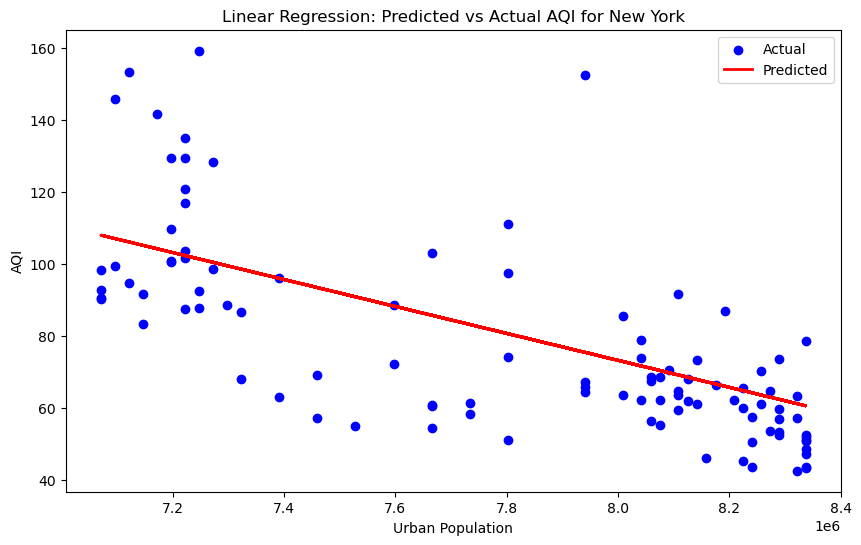


Analysis for Jacksonville:

Mean Squared Error: 90.03054320627787
R-squared: 0.03611491555990953


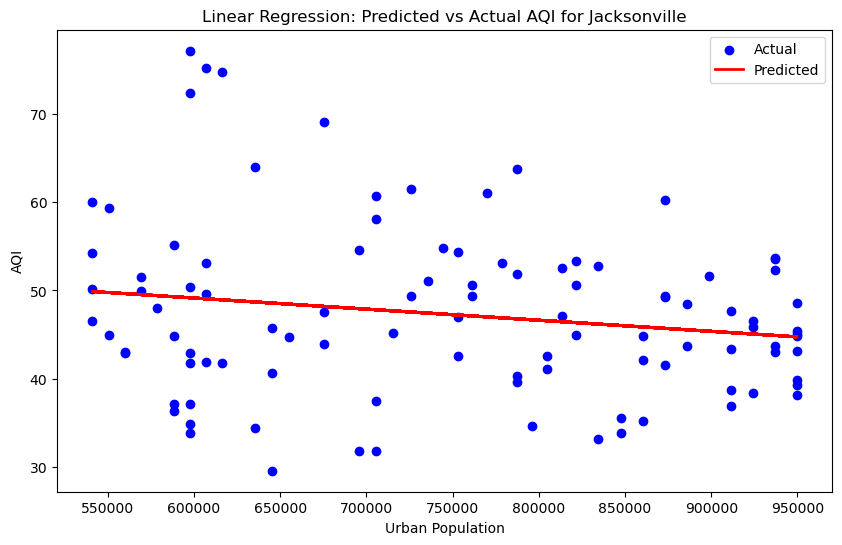


Analysis for Dallas:

Mean Squared Error: 483.8178058909507
R-squared: 0.06862875121638912


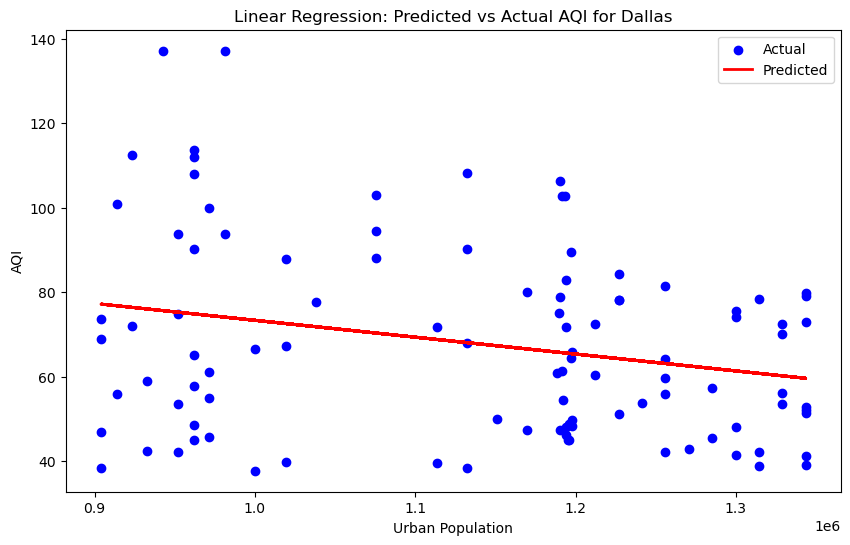


Analysis for San Antonio:

Mean Squared Error: 111.03432856504358
R-squared: 0.010877043120666174


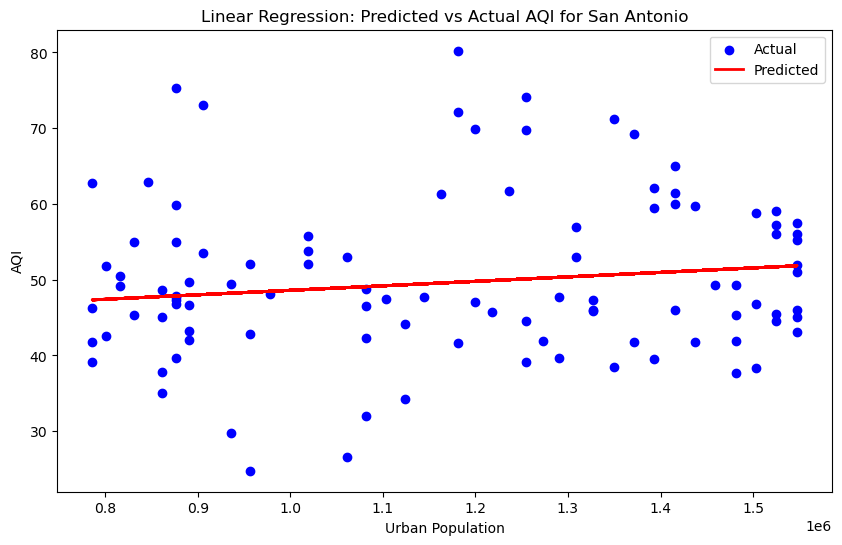


Analysis for San Diego:

Mean Squared Error: 450.907307166209
R-squared: 0.3880670293128037


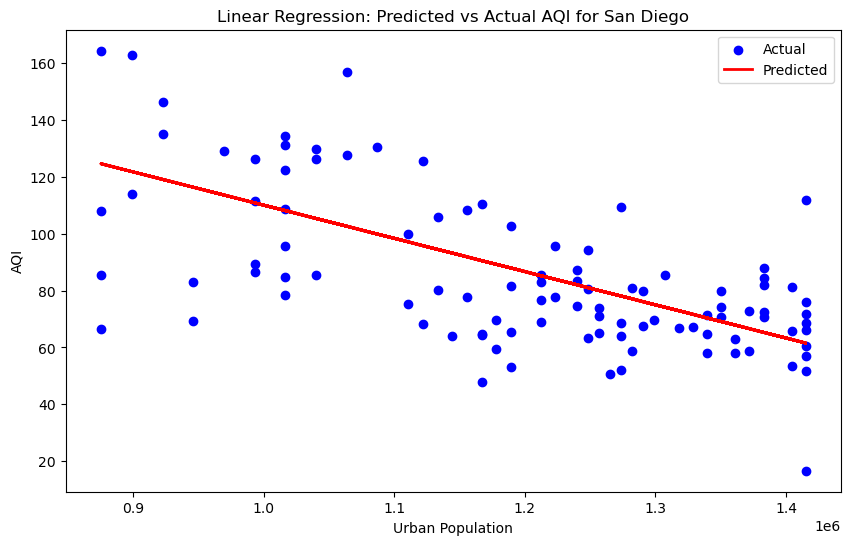


Analysis for Houston:

Mean Squared Error: 487.00937195008686
R-squared: 0.2256807592626957


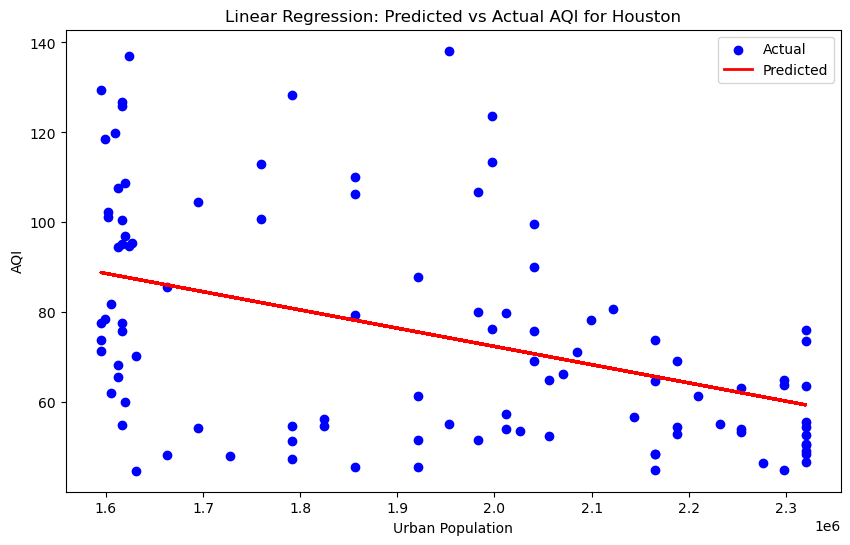


Analysis for Phoenix:

Mean Squared Error: 1133.3011656934848
R-squared: 0.04452873313304806


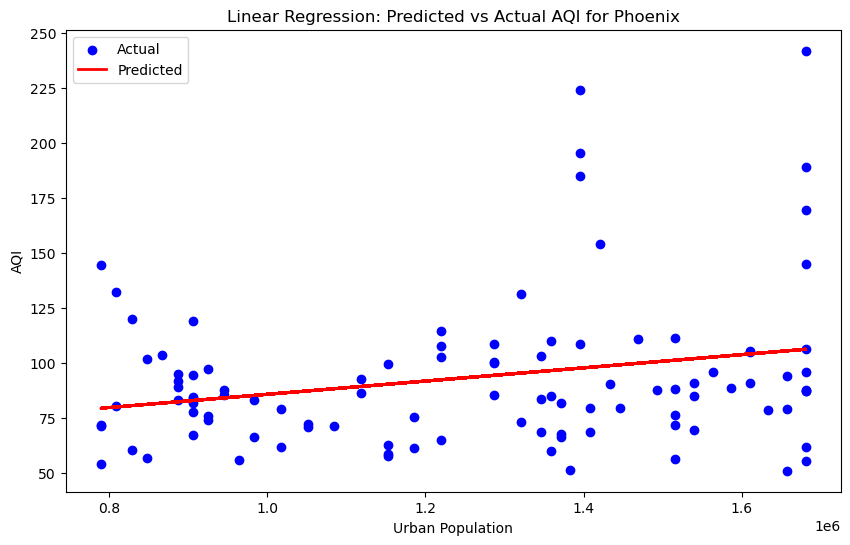


Analysis for Philadelphia:

Mean Squared Error: 689.310922711556
R-squared: 0.02491875872012861


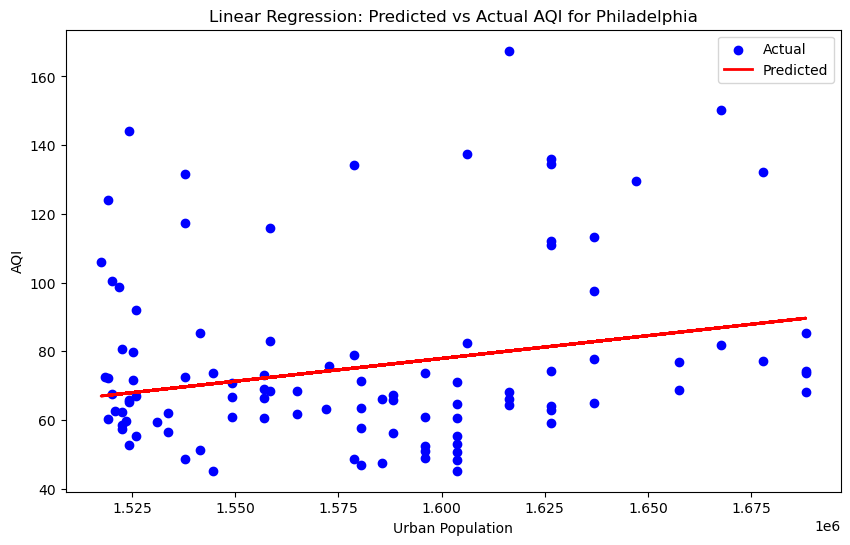


Analysis for Los Angeles:

Mean Squared Error: 1509.9884200582753
R-squared: 0.3900958194852546


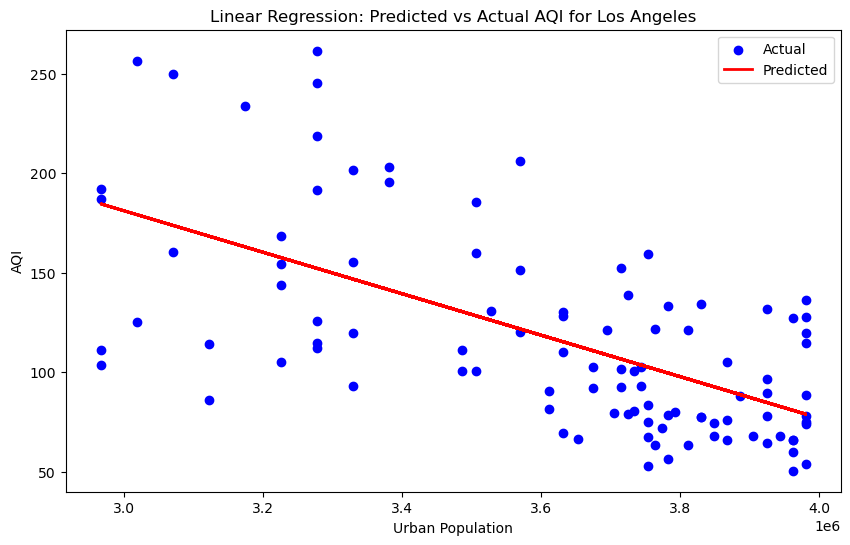


Analysis for Seattle:

Mean Squared Error: 145.26401473551454
R-squared: 0.21758624531162418


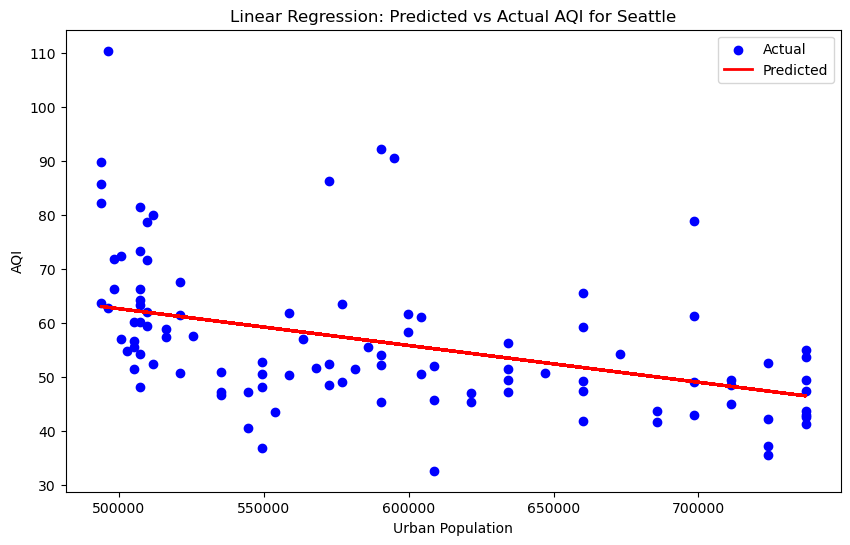

In [17]:
# Perform analysis for each city
for city in cities:
    linear_regression_city(city)

In [34]:
# Prepare the data for clustering
clustering_data = merged_df[['AQI', 'Population']].dropna()

In [35]:
# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
merged_df['Cluster'] = kmeans.fit_predict(clustering_data)


/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


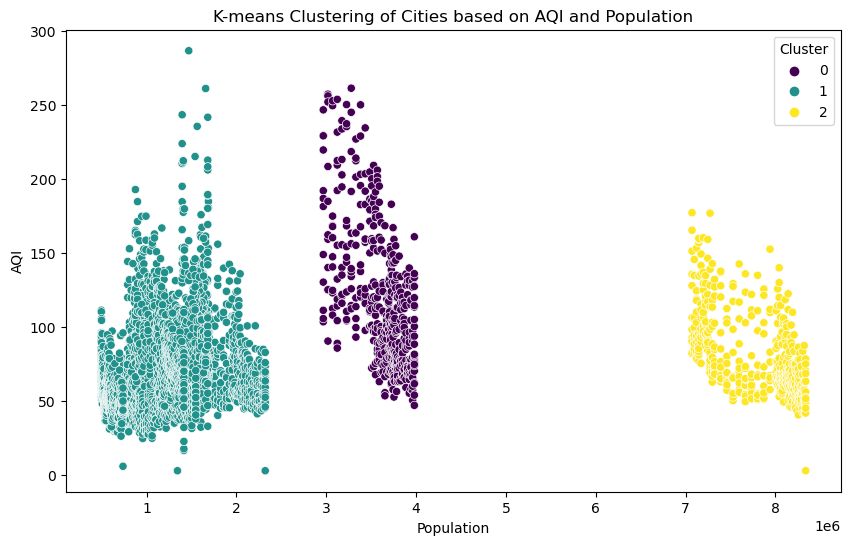

In [37]:
# Visualization of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Population', y='AQI', hue='Cluster', palette='viridis')
plt.xlabel('Population')
plt.ylabel('AQI')
plt.title('K-means Clustering of Cities based on AQI and Population')
plt.show()

In [21]:
# Function to perform SARIMA time series analysis for one city
def sarima_city(city_name, train_ratio=0.8):
    # Filter for one city
    city_aqi_df = AirQ[AirQ['City'] == city_name]
    city_aqi_df.set_index('Date', inplace=True)

    # Decompose the time series to show trend and seasonality
    if len(city_aqi_df) >= 24:  # At least 2 years of monthly data
        decomposition = seasonal_decompose(city_aqi_df['AQI'], model='additive', period=12)
        
        plt.figure(figsize=(12, 8))
        plt.subplot(411)
        plt.plot(city_aqi_df['AQI'], label='Original')
        plt.legend(loc='upper left')
        plt.subplot(412)
        plt.plot(decomposition.trend, label='Trend')
        plt.legend(loc='upper left')
        plt.subplot(413)
        plt.plot(decomposition.seasonal, label='Seasonality')
        plt.legend(loc='upper left')
        plt.subplot(414)
        plt.plot(decomposition.resid, label='Residuals')
        plt.legend(loc='upper left')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Not enough data for seasonal decomposition for {city_name}. Required: 24, Available: {len(city_aqi_df)}")
    
    # Split the data into training and testing sets
    train_size = int(len(city_aqi_df) * train_ratio)
    train, test = city_aqi_df[:train_size], city_aqi_df[train_size:]
    
    # Fit SARIMA model on training set
    model = sm.tsa.statespace.SARIMAX(train['AQI'], 
                                      order=(5, 1, 0), 
                                      seasonal_order=(1, 1, 1, 12))
    results = model.fit()
    
    # Forecast the test set
    forecast = results.get_forecast(steps=len(test))
    forecast_values = forecast.predicted_mean
    conf_int = forecast.conf_int()

    # Plot the original, forecasted, and test values
    plt.figure(figsize=(10, 6))
    plt.plot(city_aqi_df['AQI'], label='Original')
    plt.plot(results.fittedvalues, color='red', label='Fitted')
    plt.plot(forecast_values, color='green', label='Forecast')
    plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
    plt.title(f'SARIMA Time Series Analysis for {city_name}')
    plt.xlabel('Date')
    plt.ylabel('AQI')
    plt.legend()
    plt.show()

    print(f"SARIMA Model Summary for {city_name}")


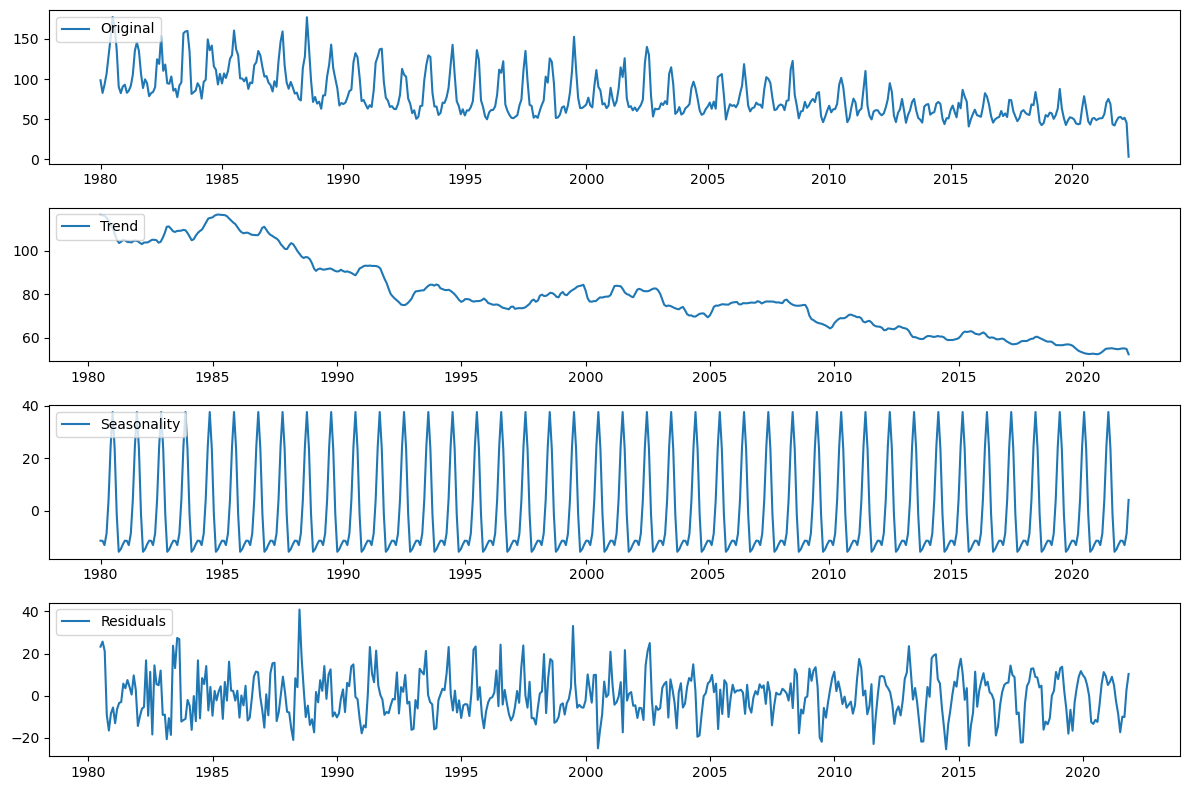

/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.77636D+00    |proj g|=  7.37346D-02

At iterate    5    f=  3.73019D+00    |proj g|=  4.61079D-02

At iterate   10    f=  3.69245D+00    |proj g|=  9.43196D-02

At iterate   15    f=  3.68670D+00    |proj g|=  3.49912D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     18     23      1     0     0   3.519D-06   3.687D+00
  F =   3.6866995800837530     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


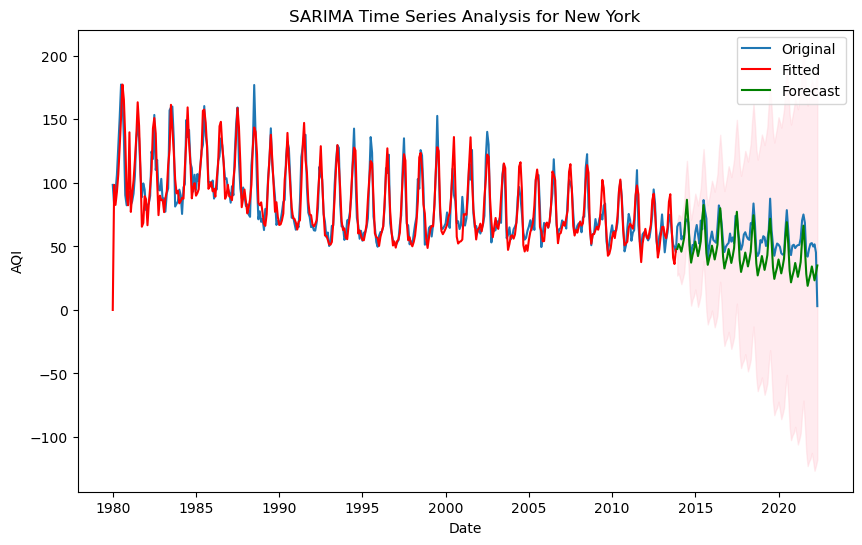

SARIMA Model Summary for New York


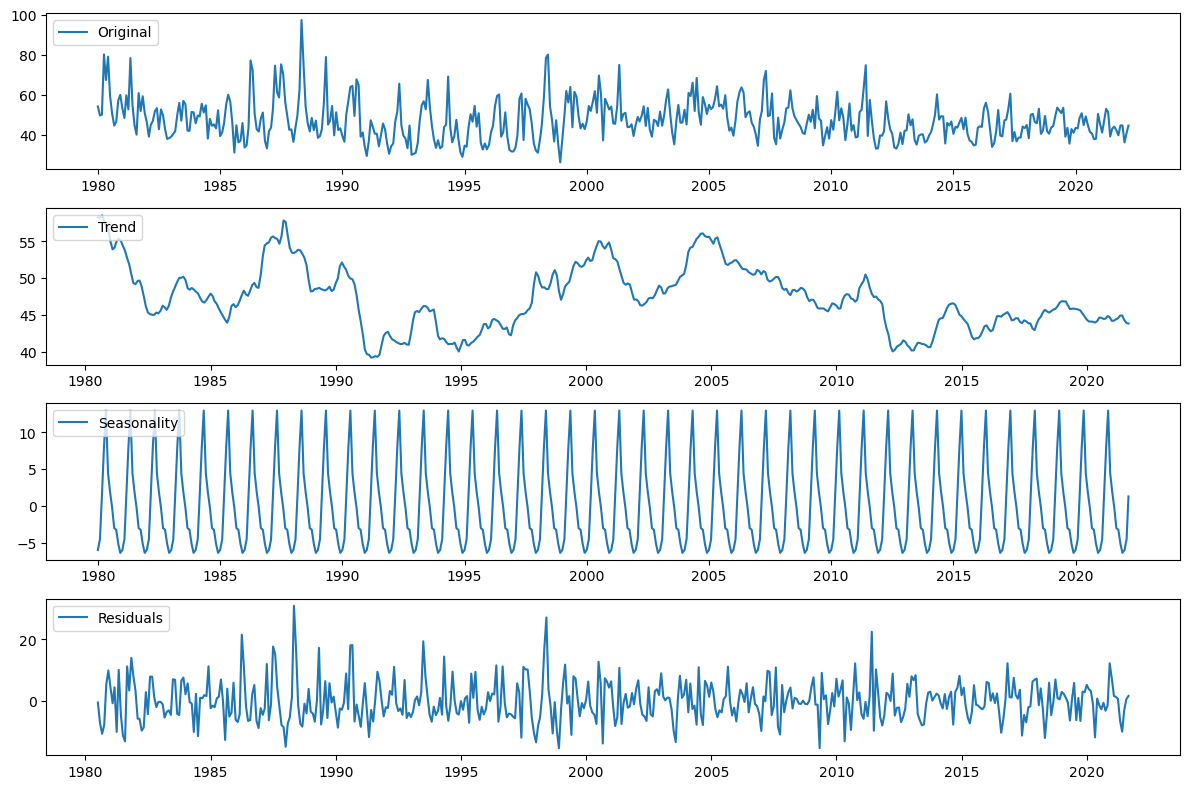

/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.51660D+00    |proj g|=  8.39859D-02

At iterate    5    f=  3.43740D+00    |proj g|=  6.57281D-02

At iterate   10    f=  3.41481D+00    |proj g|=  1.75753D-03

At iterate   15    f=  3.41457D+00    |proj g|=  1.44772D-02

At iterate   20    f=  3.41404D+00    |proj g|=  1.15170D-03

At iterate   25    f=  3.41404D+00    |proj g|=  6.28924D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     25     29      1     0     0   

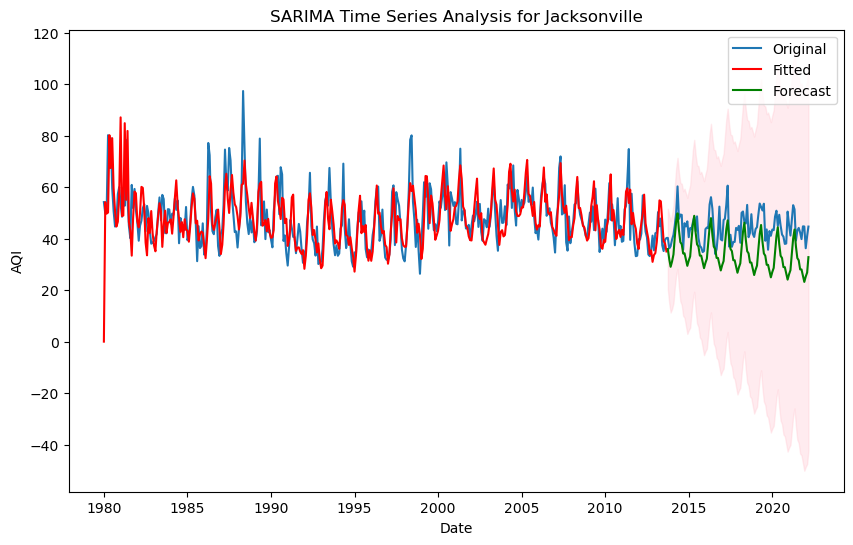

SARIMA Model Summary for Jacksonville


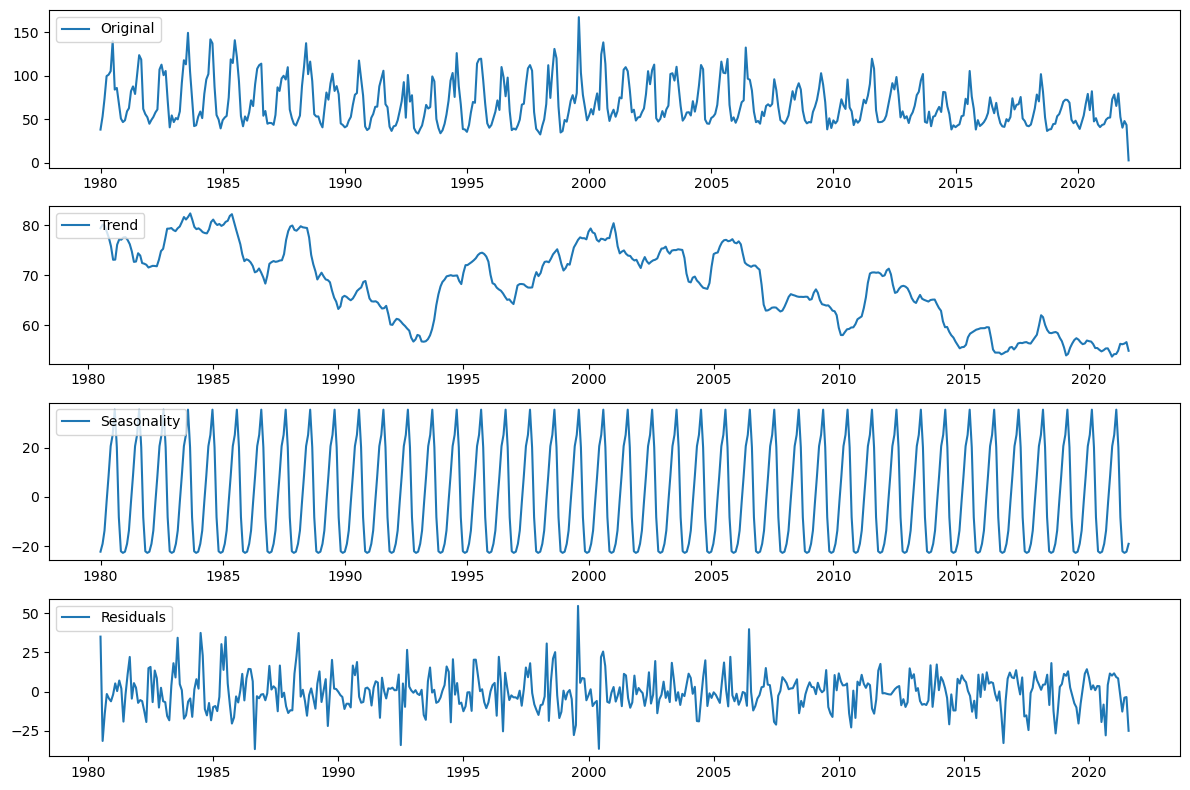

/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.99209D+00    |proj g|=  6.00771D-02

At iterate    5    f=  3.94386D+00    |proj g|=  1.94269D-02

At iterate   10    f=  3.91225D+00    |proj g|=  9.18038D-03

At iterate   15    f=  3.91211D+00    |proj g|=  2.28272D-04

At iterate   20    f=  3.91058D+00    |proj g|=  4.39377D-02

At iterate   25    f=  3.90863D+00    |proj g|=  4.01110D-03

At iterate   30    f=  3.90846D+00    |proj g|=  2.89263D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

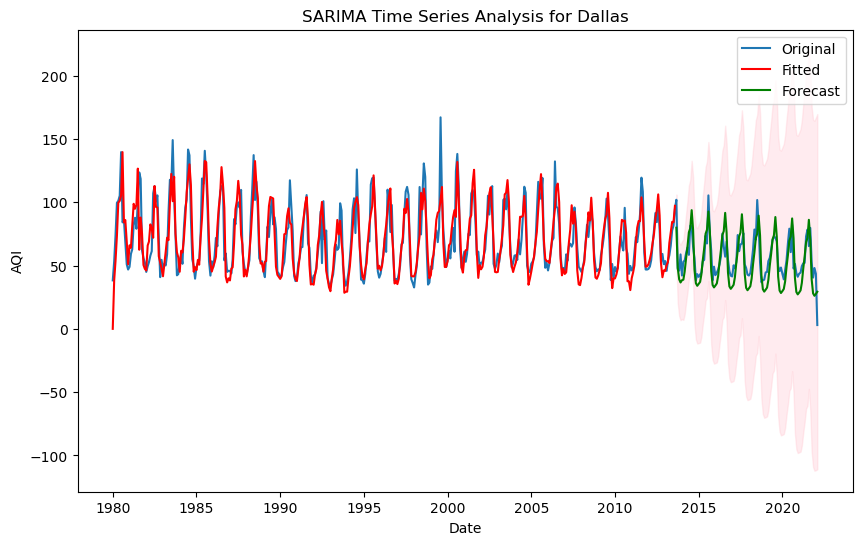

SARIMA Model Summary for Dallas


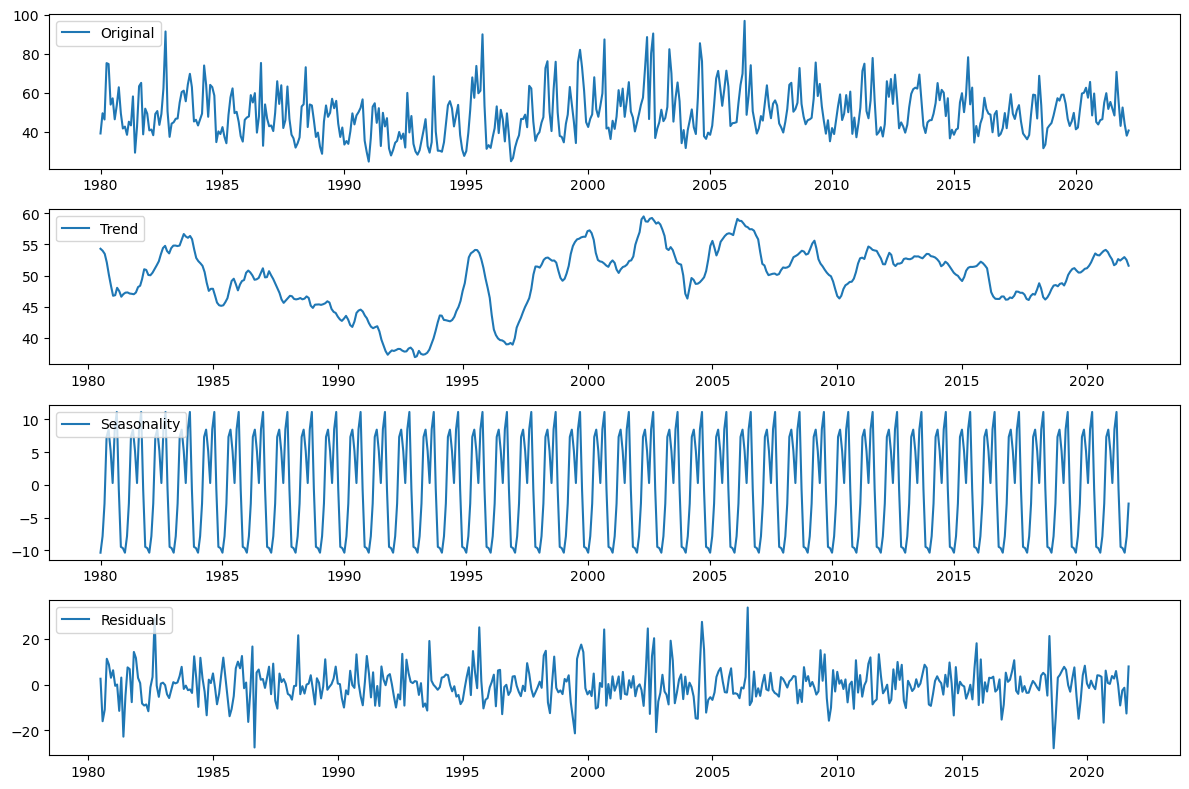

/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.67317D+00    |proj g|=  7.38892D-02

At iterate    5    f=  3.59416D+00    |proj g|=  2.99773D-02

At iterate   10    f=  3.55726D+00    |proj g|=  1.58050D-03

At iterate   15    f=  3.55726D+00    |proj g|=  2.78279D-04

At iterate   20    f=  3.55724D+00    |proj g|=  2.86314D-03

At iterate   25    f=  3.55718D+00    |proj g|=  1.34576D-03

At iterate   30    f=  3.55717D+00    |proj g|=  1.84232D-04

At iterate   35    f=  3.55717D+00    |proj g|=  8.95934D-05

At iterate   40    f=  3.55717D+00    |proj g|=  5.67958D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

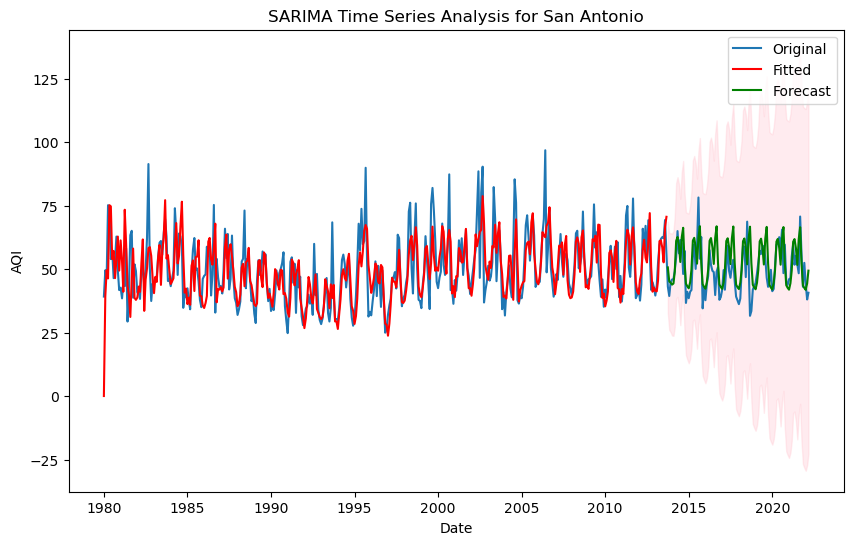

SARIMA Model Summary for San Antonio


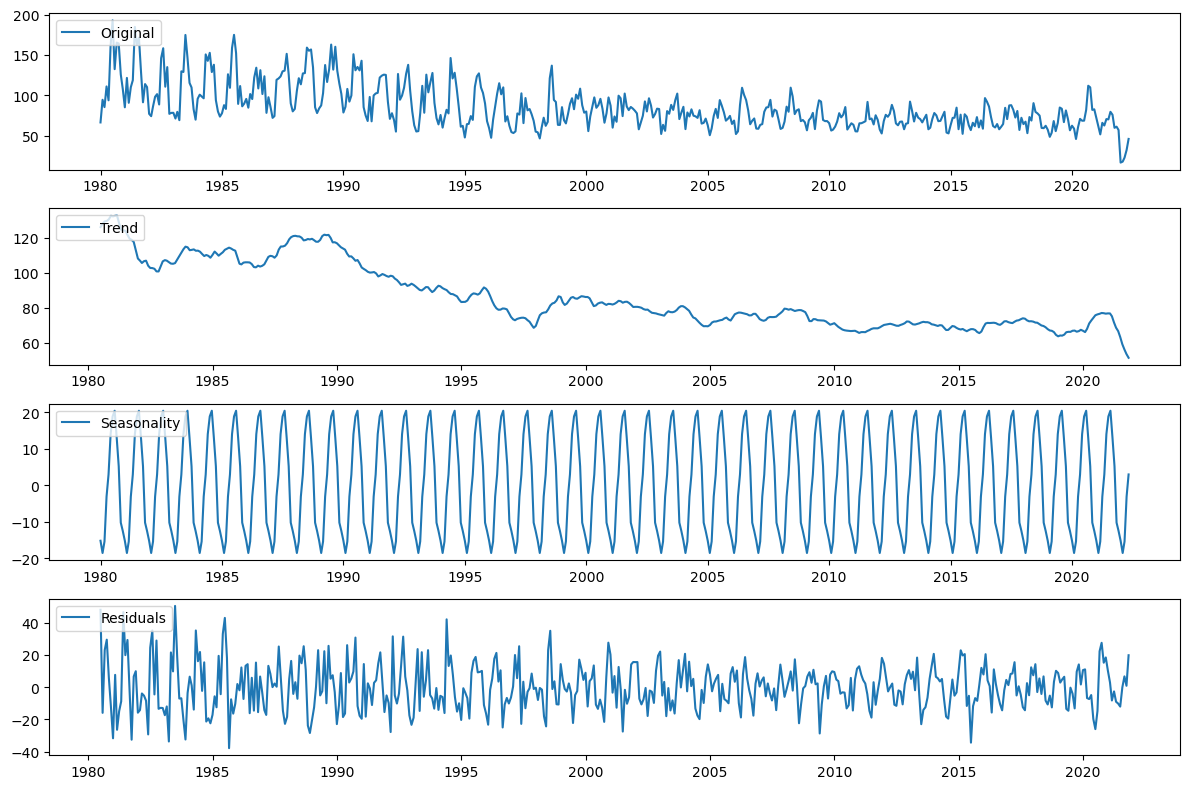

/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.12149D+00    |proj g|=  4.46224D-02

At iterate    5    f=  4.09872D+00    |proj g|=  2.02688D-02

At iterate   10    f=  4.08090D+00    |proj g|=  4.20342D-02

At iterate   15    f=  4.07118D+00    |proj g|=  3.46275D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     18     23      1     0     0   3.411D-06   4.071D+00
  F =   4.0711818936681423     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


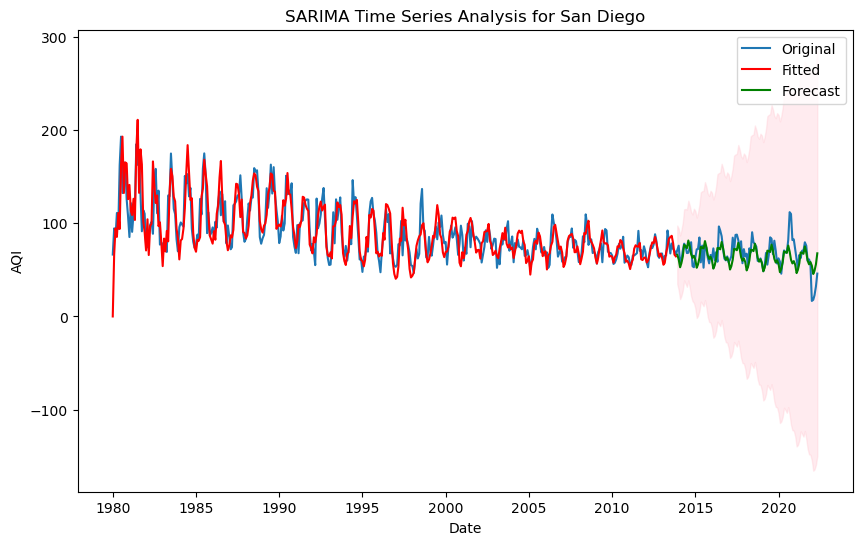

SARIMA Model Summary for San Diego


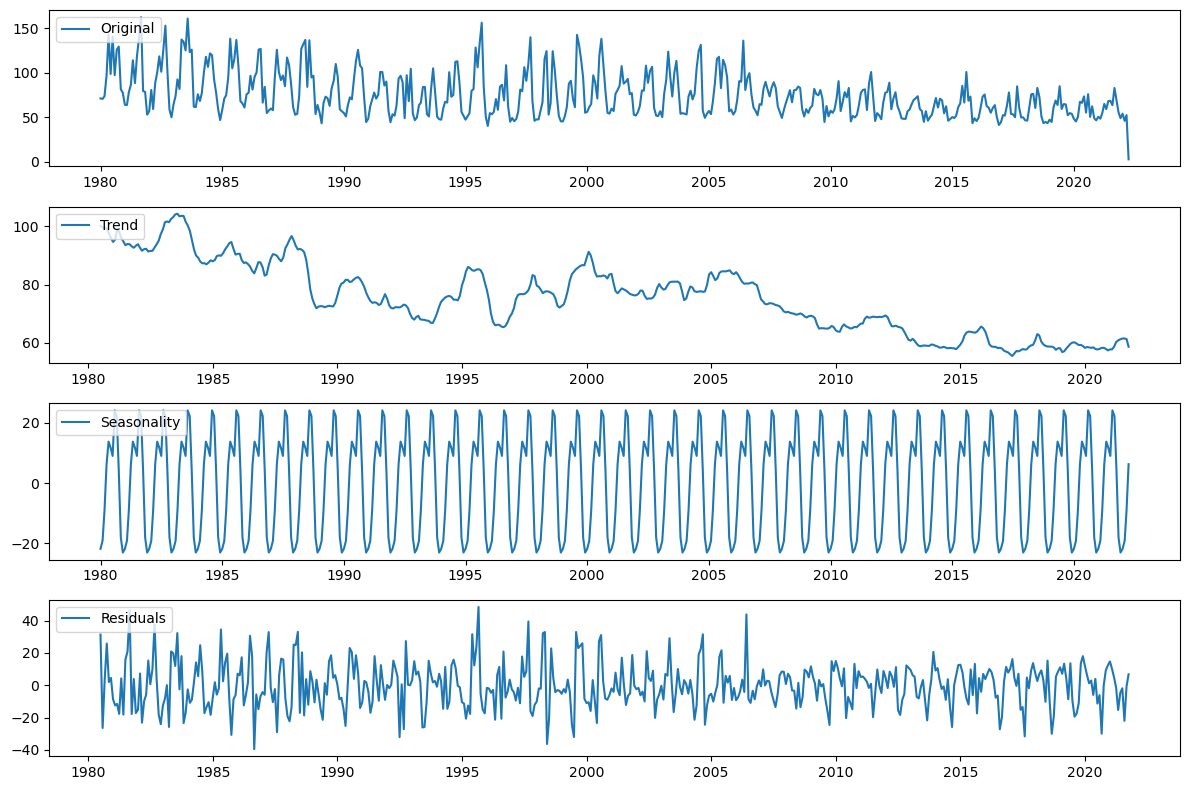

/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.20259D+00    |proj g|=  6.56821D-02

At iterate    5    f=  4.14534D+00    |proj g|=  1.62608D-02

At iterate   10    f=  4.10789D+00    |proj g|=  3.89823D-02

At iterate   15    f=  4.10507D+00    |proj g|=  7.74000D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     17     19      1     0     0   3.978D-05   4.105D+00
  F =   4.1050662250044878     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


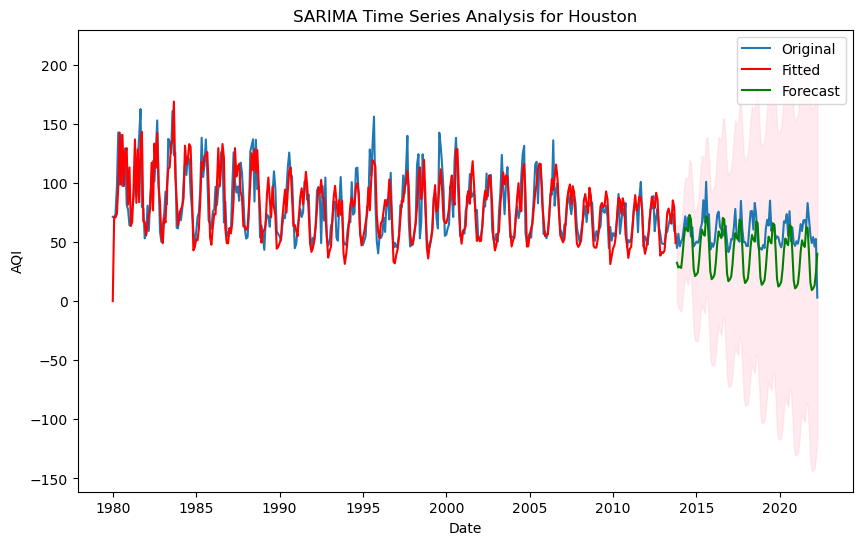

SARIMA Model Summary for Houston


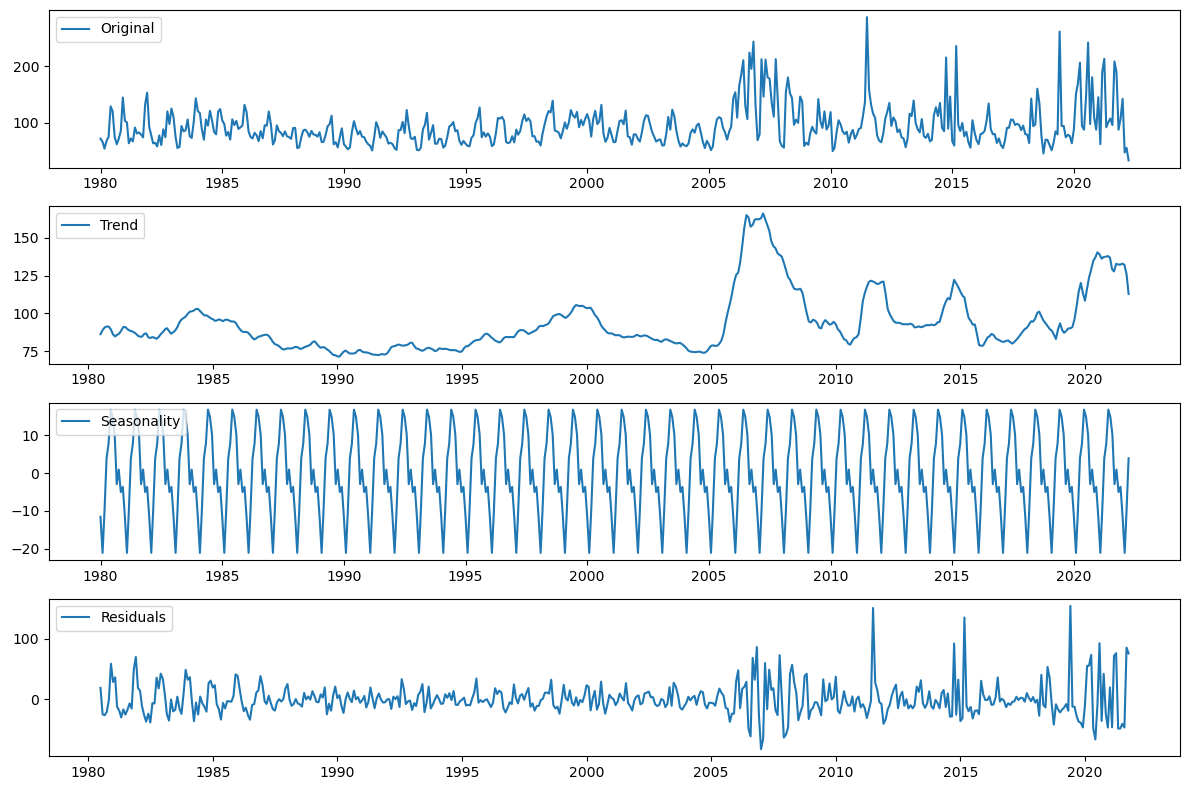

/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.53337D+00    |proj g|=  5.31608D-02

At iterate    5    f=  4.49086D+00    |proj g|=  2.78799D-02

At iterate   10    f=  4.47338D+00    |proj g|=  6.90171D-02

At iterate   15    f=  4.44752D+00    |proj g|=  8.12550D-02

At iterate   20    f=  4.44072D+00    |proj g|=  1.27981D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     23     27      1     0     0   5.115D-06   4.441D+00
  F =   4.4407110848318361     

CONVERG

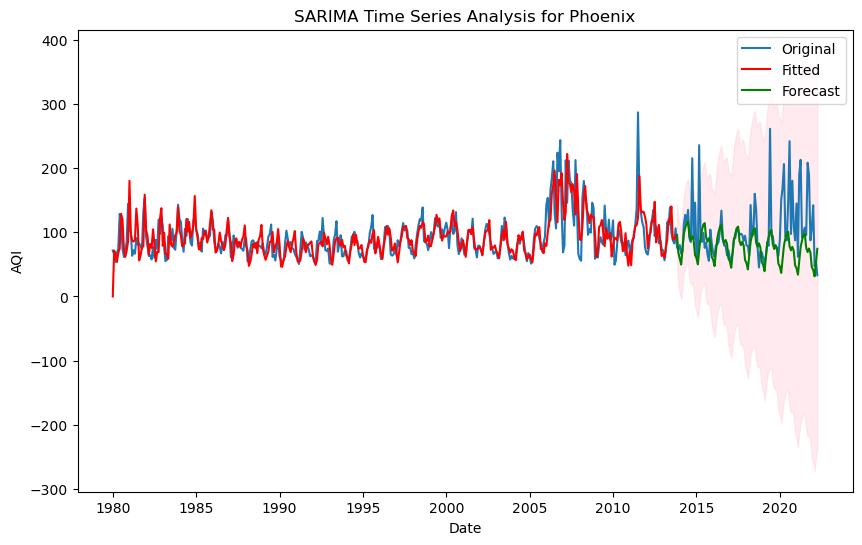

SARIMA Model Summary for Phoenix


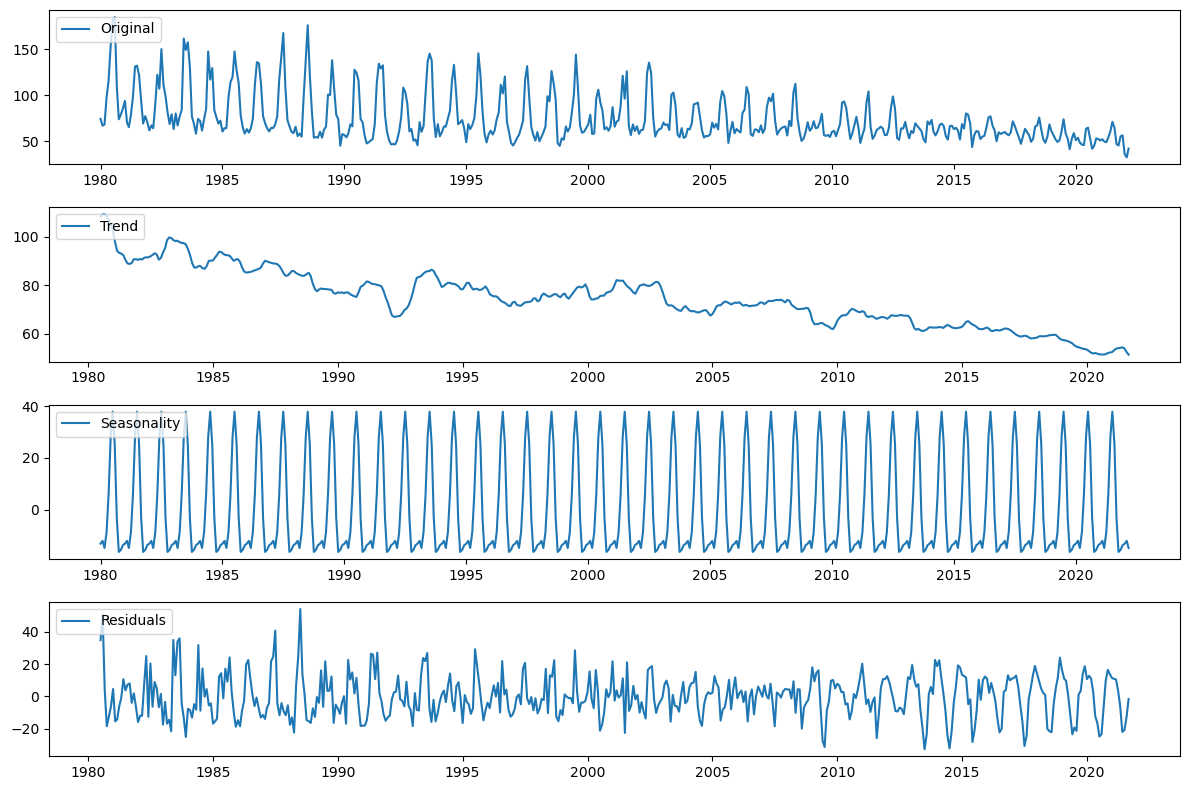

/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.90785D+00    |proj g|=  9.10126D-02

At iterate    5    f=  3.86873D+00    |proj g|=  2.27170D-02

At iterate   10    f=  3.82401D+00    |proj g|=  2.11024D-02

At iterate   15    f=  3.82251D+00    |proj g|=  7.56287D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     17     23      1     0     0   9.654D-06   3.823D+00
  F =   3.8225064798015467     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


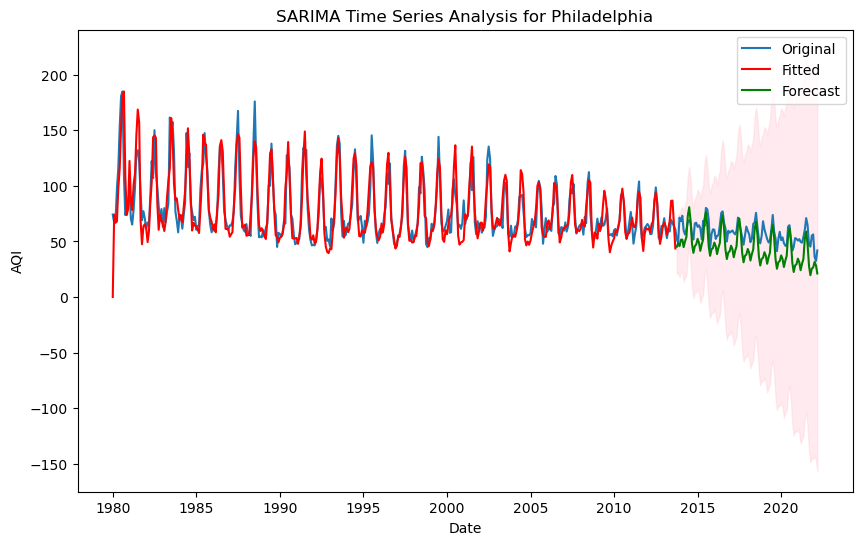

SARIMA Model Summary for Philadelphia


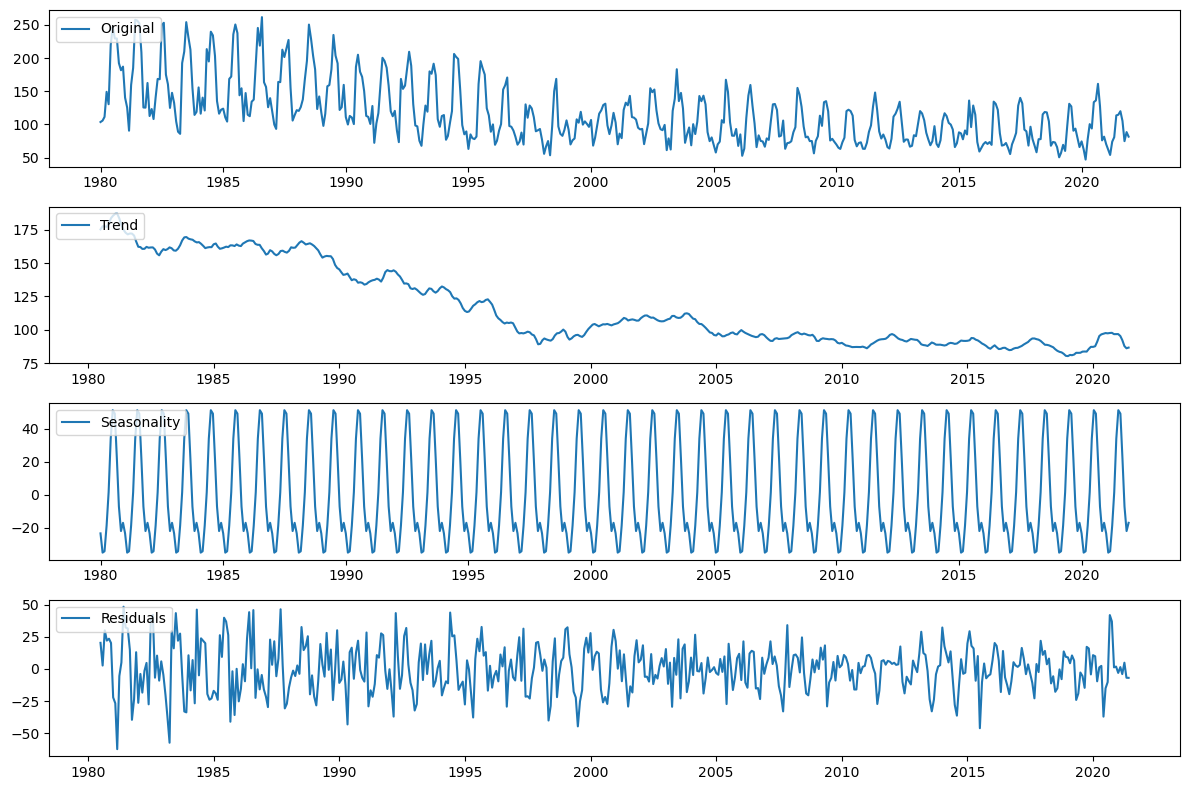

/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.37120D+00    |proj g|=  6.72077D-02

At iterate    5    f=  4.33785D+00    |proj g|=  1.21475D-02

At iterate   10    f=  4.32571D+00    |proj g|=  2.42255D-02

At iterate   15    f=  4.30810D+00    |proj g|=  3.59972D-02

At iterate   20    f=  4.30698D+00    |proj g|=  1.64697D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     20     24      1     0     0   1.647D-05   4.307D+00
  F =   4.3069815592135621     

CONVERG

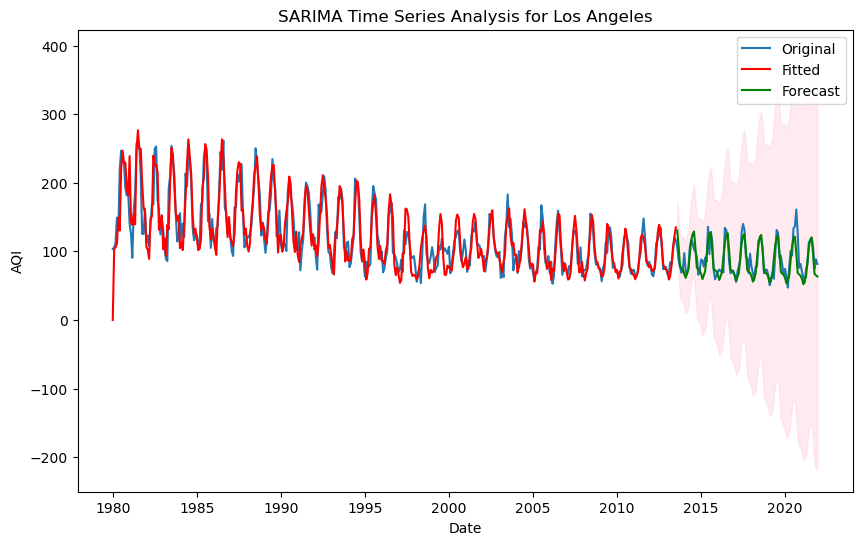

SARIMA Model Summary for Los Angeles


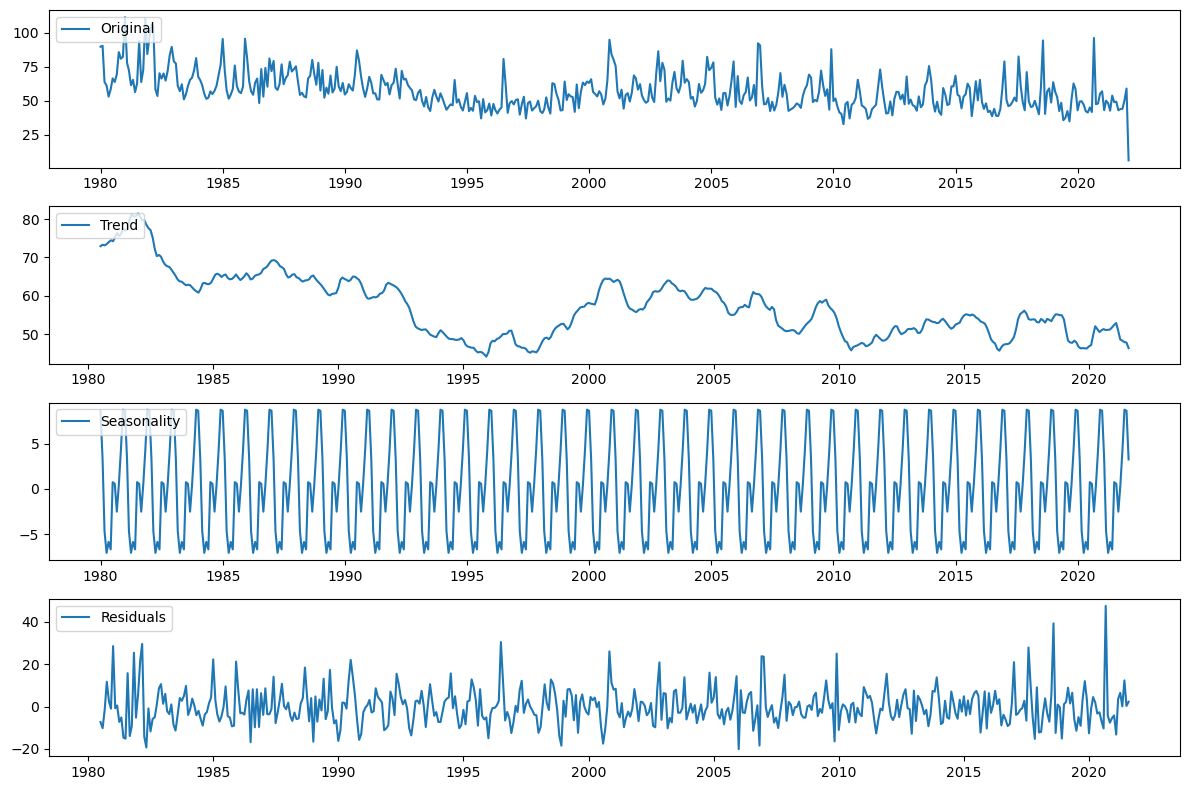

/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.64188D+00    |proj g|=  4.55929D-02

At iterate    5    f=  3.60568D+00    |proj g|=  2.55214D-02

At iterate   10    f=  3.59176D+00    |proj g|=  6.50469D-03

At iterate   15    f=  3.59155D+00    |proj g|=  1.30129D-02

At iterate   20    f=  3.58773D+00    |proj g|=  4.48555D-02

At iterate   25    f=  3.58453D+00    |proj g|=  2.95297D-03

At iterate   30    f=  3.58452D+00    |proj g|=  1.17114D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

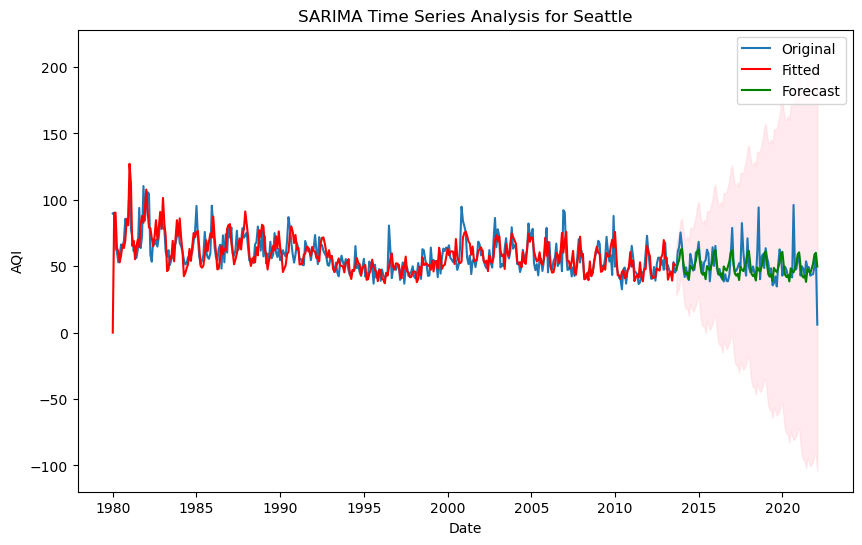

SARIMA Model Summary for Seattle


In [22]:
# Perform SARIMA analysis for each city
for city in cities:
    sarima_city(city)